## Average price per neighbourhood

We want to know which are the most expensive areas to rent. For this, we will use the *price* and *neighbourhood_cleansed* columns from the listings data frame. 

In [1]:
# Code from prior section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

listings_df = pd.read_csv('./boston_airbnb/listings.csv')

/var/folders/7k/tk6gwl6x7ldb538lk_kr3_cc0000gp/T/ipykernel_77923/713052607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_avg_price['price_num'] = listings_avg_price['price'].str[1:]
/var/folders/7k/tk6gwl6x7ldb538lk_kr3_cc0000gp/T/ipykernel_77923/713052607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_avg_price['price_num'] = listings_avg_price['price_num'].str.replace(',','')
/var/folders/7k/tk6gwl6x7ldb538lk_kr3_cc0000gp/T/ipykernel_77923/713052607.py:8: SettingWithCopyWarnin

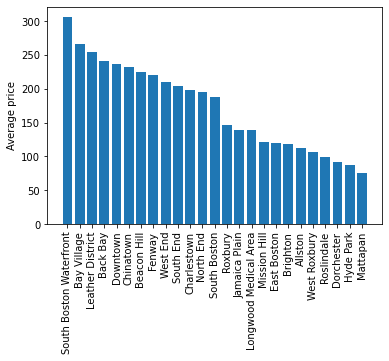

In [2]:
# Subset required columns
listings_avg_price = listings_df[['price','neighbourhood_cleansed']]

# The prices in the dataset come in a $#,###.## format and appear as text we will have to perform some
# changes in order to convert the text to numbers
listings_avg_price['price_num'] = listings_avg_price['price'].str[1:]
listings_avg_price['price_num'] = listings_avg_price['price_num'].str.replace(',','')
listings_avg_price['price_num'] = pd.to_numeric(listings_avg_price['price_num'])
listings_avg_price = listings_avg_price.drop(columns='price')

# Calculate the average price for each neighbourhood and plot our findings
listings_avg_price = listings_avg_price.groupby('neighbourhood_cleansed').mean()
listings_avg_price = listings_avg_price.sort_values(by='price_num', ascending=False)

plt.bar(listings_avg_price.index,listings_avg_price['price_num'])
plt.xticks(listings_avg_price.index, rotation='vertical')
plt.ylabel('Average price')
plt.show()